In [5]:
# Step 1: Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt


# Print TensorFlow version for reference
print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.18.0


In [5]:
# Step 1: Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt


# Print TensorFlow version for reference
print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.18.0


In [6]:
# Step 2: Define the dataset paths
BASE_DIR = "/Volumes/MOV_2T/Download/Midjourney/imagenet_midjourney" 
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VAL_DIR = os.path.join(BASE_DIR, 'val')

# Print the number of images in each directory
def count_images(directory):
    ai_count = len(os.listdir(os.path.join(directory, 'ai')))
    nature_count = len(os.listdir(os.path.join(directory, 'nature')))
    return ai_count, nature_count

train_ai, train_nature = count_images(TRAIN_DIR)
val_ai, val_nature = count_images(VAL_DIR)

print(f"Training set - AI: {train_ai}, Nature: {train_nature}")
print(f"Validation set - AI: {val_ai}, Nature: {val_nature}")


Training set - AI: 162000, Nature: 161701
Validation set - AI: 6000, Nature: 6000


In [7]:
# Step 3: Set up data augmentation for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input, # MobileNetV2 preprocessing
    rotation_range=20,                       # Random rotation
    width_shift_range=0.2,                   # Random horizontal shift
    height_shift_range=0.2,                  # Random vertical shift
    horizontal_flip=True,                    # Random horizontal flip
    zoom_range=0.15,                         # Random zoom
    fill_mode='nearest',                     # Fill strategy for created pixels
    validation_split=0.2                     # 20% validation split
)

# Validation data only needs preprocessing, no augmentation
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [8]:
# Step 4: Set up the data generators
# Constants
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Training generator
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    classes=['nature', 'ai'],  # 0 for nature, 1 for AI
    shuffle=True
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    classes=['nature', 'ai'],
    shuffle=False
)


Found 323701 images belonging to 2 classes.
Found 12000 images belonging to 2 classes.


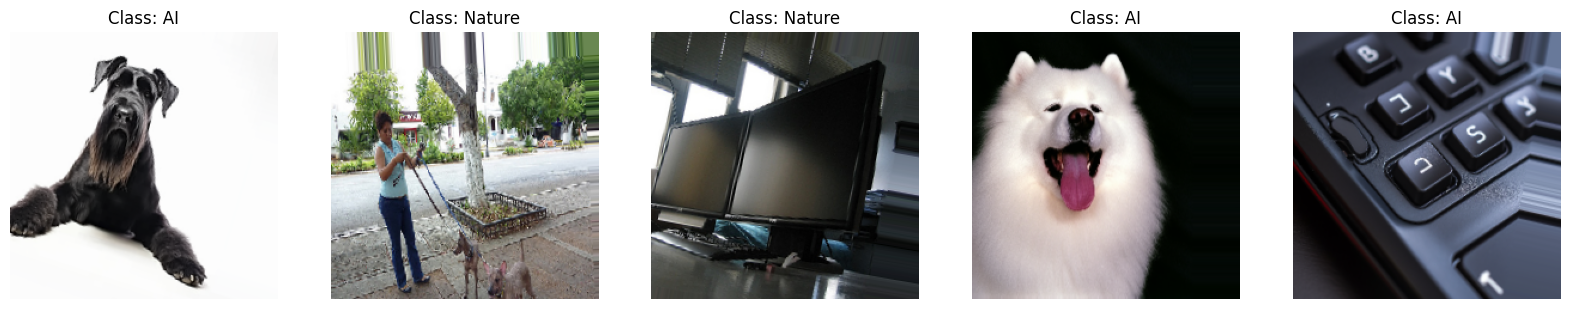

In [9]:
# Step 5: Visualize some augmented images
def plot_augmented_images(generator):
    plt.figure(figsize=(20, 4))
    for i in range(5):
        batch = next(generator)
        image = batch[0][0]  # Get the first image from the batch
        # Reverse the preprocessing to display the image
        image = image - np.min(image)
        image = image / np.max(image)
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(image)
        plt.title(f'Class: {"AI" if batch[1][0] == 1 else "Nature"}')
        plt.axis('off')
    plt.show()

# Display some augmented training images
plot_augmented_images(train_generator)


In [10]:
# Step 6: Create a function to check the data pipeline
def test_data_pipeline():
    # Test batch shapes
    batch_x, batch_y = next(train_generator)
    print("Training batch shapes:")
    print(f"Input shape: {batch_x.shape}")
    print(f"Labels shape: {batch_y.shape}")
    
    # Check value ranges
    print("\nValue ranges:")
    print(f"Min pixel value: {batch_x.min()}")
    print(f"Max pixel value: {batch_x.max()}")
    print(f"Label values: {np.unique(batch_y)}")
    
    # Calculate steps per epoch
    steps_per_epoch = train_generator.samples // BATCH_SIZE
    val_steps = val_generator.samples // BATCH_SIZE
    
    print("\nTraining configuration:")
    print(f"Steps per epoch: {steps_per_epoch}")
    print(f"Validation steps: {val_steps}")

# Run the test
test_data_pipeline()


Training batch shapes:
Input shape: (32, 224, 224, 3)
Labels shape: (32,)

Value ranges:
Min pixel value: -1.0
Max pixel value: 1.0
Label values: [0. 1.]

Training configuration:
Steps per epoch: 10115
Validation steps: 375


In [11]:
# Step 7: Save the data generator configuration
import json

generator_config = {
    'preprocessing_function': 'mobilenet_v2_preprocess_input',
    'rotation_range': 20,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'horizontal_flip': True,
    'zoom_range': 0.15,
    'fill_mode': 'nearest',
    'validation_split': 0.2,
    'target_size': [IMG_HEIGHT, IMG_WIDTH],
    'batch_size': BATCH_SIZE
}

with open('data_generator_config.json', 'w') as f:
    json.dump(generator_config, f, indent=4)
